# Identifying Right AD Banner Using MAB

 First, let us import necessary libraries

In [1]:
import gym_bandits
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
env = gym.make("BanditTenArmedGaussian-v0")

Let us simulate a dataset with 8*10000 as shape where the column is the ad banner type and rows are either 0 or 1 i.e whether the ad has been clicked or not clicked by the user respectively



In [2]:
df = pd.DataFrame()
df['loc_type_0'] = np.random.randint(0,2,100000)
df['loc_type_1'] = np.random.randint(0,2,100000)
df['loc_type_2'] = np.random.randint(0,2,100000)
df['loc_type_3'] = np.random.randint(0,2,100000)
df['loc_type_4'] = np.random.randint(0,2,100000)
df['loc_type_5'] = np.random.randint(0,2,100000)
df['loc_type_6'] = np.random.randint(0,2,100000)
df['loc_type_7'] = np.random.randint(0,2,100000)

In [3]:
df.head(20)

,loc_type_0,loc_type_1,loc_type_2,loc_type_3,loc_type_4,loc_type_5,loc_type_6,loc_type_7
0,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,1,0,1,1,1
3,0,0,0,0,1,0,1,0
4,0,1,0,1,0,1,0,1
5,1,0,0,0,1,0,1,0
6,0,0,0,0,0,1,0,0
7,0,1,0,1,1,0,0,0
8,1,0,1,1,0,0,0,0
9,1,1,1,0,0,1,0,1


First, let us initialize necessary variables

In [4]:
# number of banners
num_loc = 8

# number of iterations
no_of_iterations = 1000

# list for storing banners which are selected
loc_selected = []

# count number of times the banner was selected
count = np.zeros(num_loc)

# Q value of the banner
Q = np.zeros(num_loc)

# sum of rewards obtained by the banner
sum_rewards = np.zeros(num_loc)

 Now we define the epsilon greedy policy

In [5]:
def epsilon_greedy(epsilon):
    
    random_value = np.random.random()
    choose_random = random_value < epsilon
    
    if choose_random:
        action =  np.random.choice(num_loc)
    else:
        action = np.argmax(Q)
    
    return action


In [6]:
for i in range(no_of_iterations):
    
    # select the banner using epsilon greedy policy
    loc = epsilon_greedy(0.5)
        
    # get the reward
    reward = df.values[i, loc]
           
    # update the selected banner count
    count[loc] += 1
    
    # sum the rewards obtained by that banner
    sum_rewards[loc]+=reward
    
    # calculate the Q value of the banner
    Q[loc] = sum_rewards[loc]/count[loc]
    
    loc_selected.append(loc)    
   
print(Q)
print(count)
print(sum_rewards)
print(loc_selected)

[0.5        0.5106383  0.50561798 0.45833333 0.51162791 0.46774194
 0.50971922 0.46774194]
[ 72.  94.  89.  72.  86.  62. 463.  62.]
[ 36.  48.  45.  33.  44.  29. 236.  29.]
[2, 2, 4, 2, 0, 2, 2, 2, 2, 5, 7, 5, 0, 1, 1, 1, 5, 3, 5, 2, 2, 4, 4, 1, 2, 4, 2, 2, 7, 1, 7, 2, 4, 2, 6, 3, 2, 6, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 3, 1, 1, 6, 1, 1, 1, 7, 6, 1, 4, 0, 1, 6, 0, 1, 3, 3, 1, 3, 3, 3, 1, 0, 5, 3, 6, 6, 1, 5, 6, 7, 4, 1, 6, 6, 6, 1, 6, 5, 1, 1, 1, 6, 3, 6, 6, 6, 7, 5, 6, 6, 1, 6, 3, 0, 6, 6, 2, 6, 6, 0, 5, 6, 5, 2, 6, 6, 6, 1, 2, 2, 6, 6, 5, 3, 6, 6, 6, 6, 6, 1, 1, 1, 5, 5, 1, 5, 6, 6, 1, 6, 4, 4, 0, 7, 4, 4, 4, 6, 6, 4, 4, 0, 2, 6, 4, 6, 7, 4, 7, 1, 4, 4, 1, 4, 4, 0, 6, 0, 1, 3, 0, 3, 7, 0, 3, 6, 6, 0, 0, 4, 6, 4, 0, 0, 0, 6, 0, 1, 0, 0, 5, 7, 0, 0, 0, 7, 6, 6, 2, 6, 6, 6, 2, 6, 3, 1, 6, 6, 6, 3, 7, 7, 0, 1, 1, 0, 6, 4, 6, 2, 6, 6, 5, 0, 1, 6, 5, 2, 1, 4, 3, 5, 3, 4, 4, 6, 6, 4, 6, 6, 6, 1, 6, 0, 6, 6, 2, 6, 7, 6, 5, 6, 3, 6, 6, 6, 6, 4, 6, 1, 2, 6, 5, 6, 4, 6, 0, 0, 3, 6, 1, 3,

We can plot and see which banner type gives us most clicks(rewards)

/Users/hyebin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

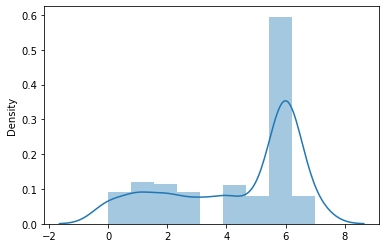

In [7]:
sns.distplot(loc_selected)